# Verkaufsanalyse

**Import necessary libraries**

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

**Merging 12 months of sales data into one CSV**

In [2]:
path = "./Verkaufsdata"
files = [file for file in os.listdir(path) if not file.startswith('.')] # Ignore hidden files

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv(path+"/"+file, header=0)
    all_months_data = pd.concat([all_months_data, df])
    
all_months_data.to_csv("all_data.csv", index=False)

In [3]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


## Data Cleaning!

**I have found in practice, that i find things i need to clean as i perform operations and get errors. Based on the error, i decide how i should go about cleaning the data**

**Drop rows of NaN**

In [4]:
# Find NAN
nan_df = all_data[all_data.isna().any(axis=1)]
display(nan_df.head()) #there is 545 rows of NaN.

all_data = all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


**Remove duplicate Rows (Order ID	Product	Quantity Ordered	Price Each	Order Date	Purchase Address	Month)**

In [5]:
all_data.drop_duplicates(keep=False, inplace=True)

In [6]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

**Convert Columns to the correct type**

In [7]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [32]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'], format = '%Y-%m-%d %H:%M')

In [29]:
#all_data['Order Date'] = all_data['Order Date'].apply(lambda t: t.strftime('%Y-%m-%d %H:%M'))
all_data.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
dtype: object

In [30]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,2019-04-12 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27,"333 8th St, Los Angeles, CA 90001"


### Augment data with additional columns¶


**1. Add month column**

In [33]:
all_data['Month'] = all_data['Order Date'].dt.strftime('%m')
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4


**2. Add Sales column**

In [34]:
all_data['Sales'] = all_data['Quantity Ordered']*all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99


**3. Add a city column**

In [35]:
def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


# Question 1: What is the best month of Sales? how much was earned that month?

In [36]:
results_1 = all_data.groupby('Month').sum()

Text(0.5, 1.0, 'Sales in 2019')

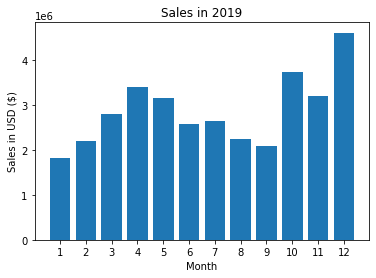

In [37]:
months = range(1,13)
plt.bar(months,results_1['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month')
plt.title('Sales in 2019')

#### -----------> best Month December with 4M. 

# Question 2: What city had the highest number of sales?

In [38]:
results_2 = all_data.groupby('City').sum()
results_2

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16566,2.777309e+06,104504,2.792900e+06
Austin (TX),11121,1.806806e+06,69611,1.816507e+06
Boston (MA),22460,3.631387e+06,140684,3.655613e+06
Dallas (TX),16684,2.747425e+06,104274,2.762773e+06
Los Angeles (CA),33205,5.412908e+06,207715,5.444038e+06
New York City (NY),27874,4.630470e+06,175373,4.659417e+06
Portland (ME),2742,4.463155e+05,17094,4.488845e+05
Portland (OR),11279,1.859115e+06,70413,1.869289e+06
San Francisco (CA),50099,8.196541e+06,314378,8.247283e+06


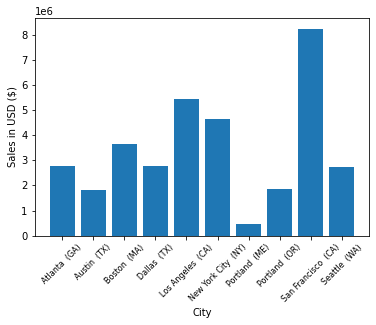

In [39]:
keys = [city for city, df in all_data.groupby(['City'])]

plt.bar(keys,results_2['Sales'])
plt.ylabel('Sales in USD ($)')
plt.xlabel('City')
plt.xticks(keys, rotation=45, size=8)
plt.show()

#### -----------> best City sales is San Francisco

# Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [40]:
all_data['Order Hour'] = all_data['Order Date'].dt.strftime('%H:00')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Order Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),08:00
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22:00
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14:00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14:00
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),09:00


In [41]:
results_3 = all_data.groupby('Order Hour').sum()

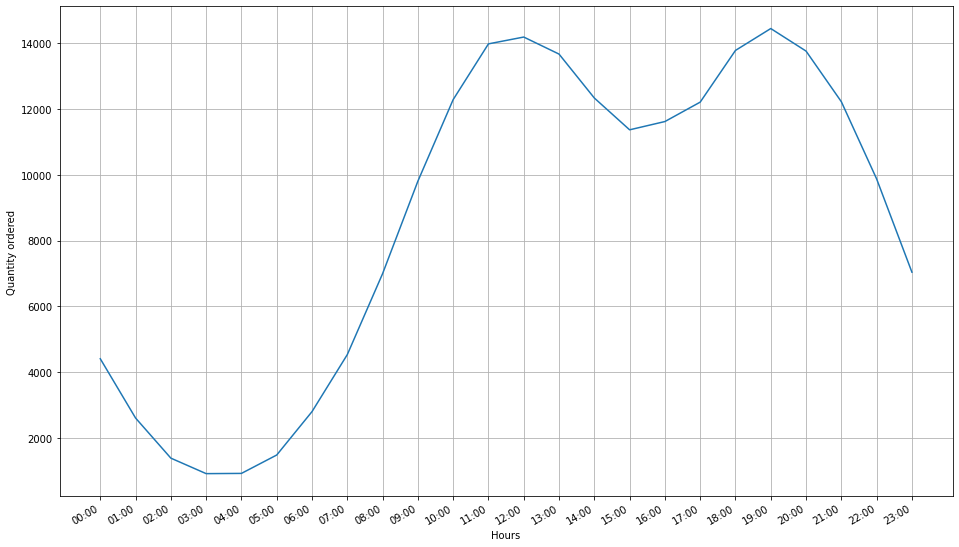

In [42]:
plt.figure(figsize=(16,10))
plt.plot(results_3.index, results_3['Quantity Ordered'])
plt.xlabel('Hours')
plt.ylabel('Quantity ordered')
plt.gcf().autofmt_xdate()
plt.grid()
plt.show()

#### -----------> best Time to advertize is before 12:00  or 19:00

# Question 4: What products are most often sold together?

In [43]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Order Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),08:00
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22:00
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14:00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14:00
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),09:00


In [46]:
all_data.Product.unique()

array(['USB-C Charging Cable', 'Bose SoundSport Headphones',
       'Google Phone', 'Wired Headphones', 'Macbook Pro Laptop',
       'Lightning Charging Cable', '27in 4K Gaming Monitor',
       'AA Batteries (4-pack)', 'Apple Airpods Headphones',
       'AAA Batteries (4-pack)', 'iPhone', 'Flatscreen TV',
       '27in FHD Monitor', '20in Monitor', 'LG Dryer', 'ThinkPad Laptop',
       'Vareebadd Phone', 'LG Washing Machine', '34in Ultrawide Monitor'],
      dtype=object)

**if we see the Order ID column we get like same ID for an Order so we need to get the Products that they are together sold**

In [77]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))
df2 = df[['Order ID', 'Grouped']].drop_duplicates()
df2.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Order ID,Grouped
3,176560,"Google Phone, Wired Headphones"
18,176574,"Google Phone, USB-C Charging Cable"
32,176586,"AAA Batteries (4-pack), Google Phone"
119,176672,"Lightning Charging Cable, USB-C Charging Cable"
129,176681,"Apple Airpods Headphones, ThinkPad Laptop"


In [78]:
df2.Grouped.unique()

array(['Google Phone, Wired Headphones',
       'Google Phone, USB-C Charging Cable',
       'AAA Batteries (4-pack), Google Phone',
       'Lightning Charging Cable, USB-C Charging Cable',
       'Apple Airpods Headphones, ThinkPad Laptop',
       'Bose SoundSport Headphones, AAA Batteries (4-pack)',
       '34in Ultrawide Monitor, Google Phone',
       'iPhone, Lightning Charging Cable',
       'Google Phone, Bose SoundSport Headphones, Wired Headphones',
       'AAA Batteries (4-pack), 27in FHD Monitor',
       'USB-C Charging Cable, AAA Batteries (4-pack)',
       'iPhone, Wired Headphones', 'iPhone, 27in 4K Gaming Monitor',
       'ThinkPad Laptop, AAA Batteries (4-pack)',
       'iPhone, Apple Airpods Headphones, AAA Batteries (4-pack)',
       'Wired Headphones, Apple Airpods Headphones',
       'Macbook Pro Laptop, ThinkPad Laptop',
       'AA Batteries (4-pack), Flatscreen TV',
       'Vareebadd Phone, USB-C Charging Cable',
       'USB-C Charging Cable, Lightning Charging Cab

In [80]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))# <--- we can change the number to 3 so we get the 3 common most sold products

for key,value in count.most_common(10):
    print(key, value)

('iPhone', ' Lightning Charging Cable') 998
('Google Phone', ' USB-C Charging Cable') 983
('iPhone', ' Wired Headphones') 447
('Google Phone', ' Wired Headphones') 412
('Vareebadd Phone', ' USB-C Charging Cable') 361
('iPhone', ' Apple Airpods Headphones') 360
('Google Phone', ' Bose SoundSport Headphones') 220
('Vareebadd Phone', ' Wired Headphones') 143
(' USB-C Charging Cable', ' Wired Headphones') 117
('Vareebadd Phone', ' Bose SoundSport Headphones') 80


#### -----------> Most products sold together is (iPhone,  Lightning Charging Cable) with 998 order

# Question 5 : What Product sold the most? Why it sold the most!

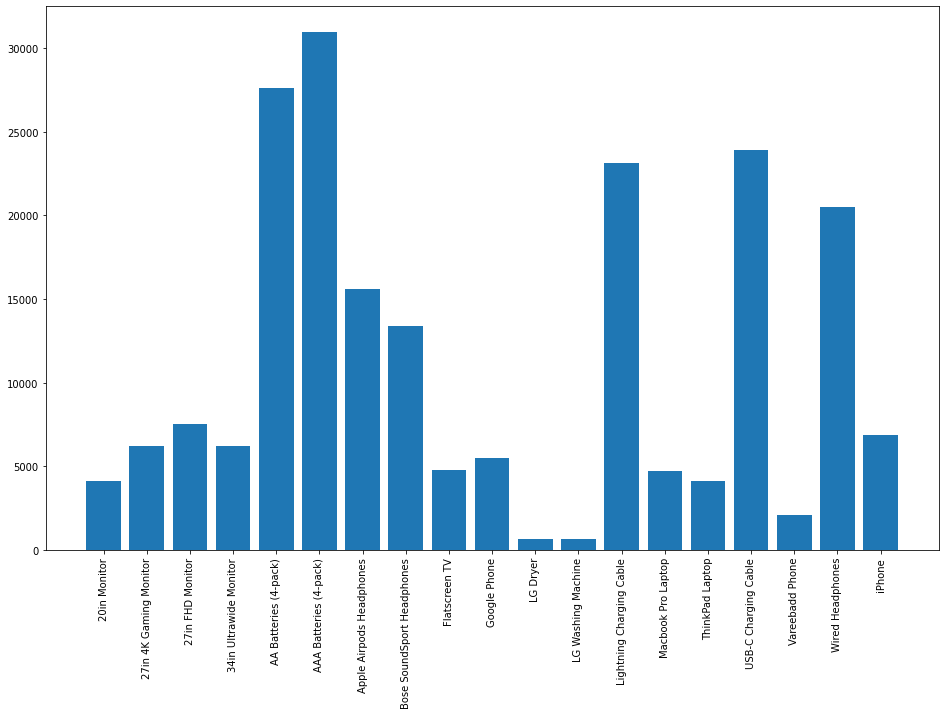

In [84]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

keys = [pair for pair, df in product_group]
plt.figure(figsize=(16,10))
plt.bar(keys, quantity_ordered)
plt.xticks(keys, rotation='vertical', size=10)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


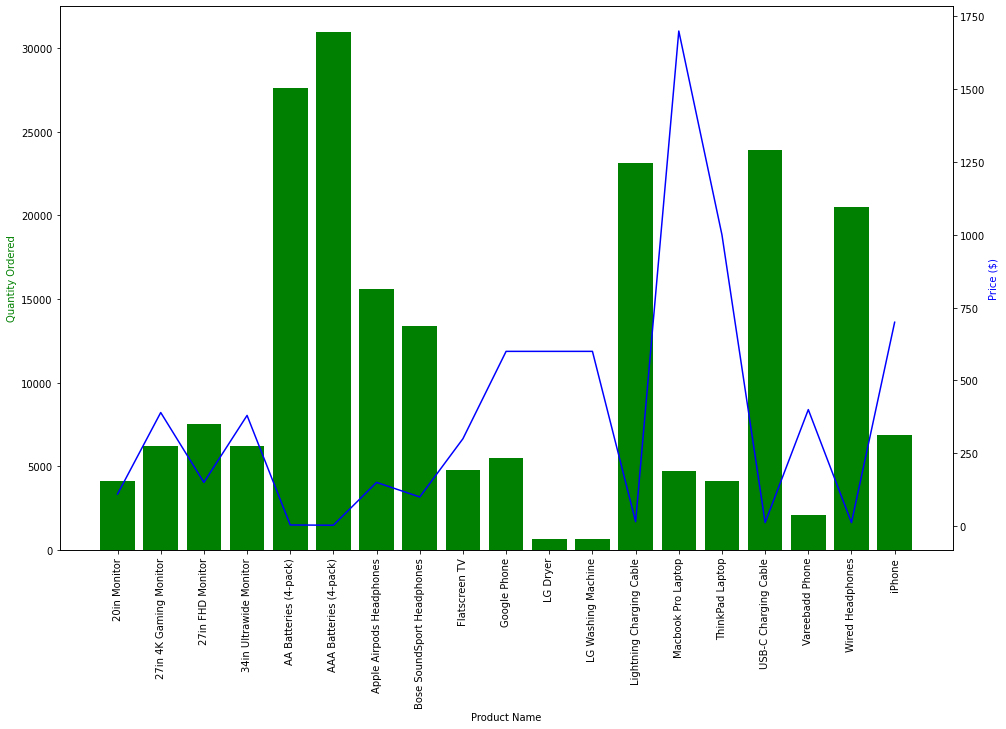

In [91]:
prices = all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots(figsize=(16,10))

ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered, color='g')
ax2.plot(keys, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(keys, rotation=90, size=10)

fig.show()

**So we see whenever the Quantity order is High we see the price is low (triple-a and double-a Batteries) but not in general like LG and Macbook Pro and Iphone there is more demand**